# Double Pendulum using Lagrange Equations

We solve the double pendulum problem described in Taylor section 11.4 using the lagrangian method.

### Starting with Kinetic and Potential Energy 

### We have for Kinetic energy: 

$\begin{align} 
   T = \frac12 (m_{1} + m_{2}) L_{1}^2 \dot\phi_{1}^2 + m_{2} L_{1} L_{2} \dot\phi_{1} \dot\phi_{2} \cos(\phi_{1} - \phi_{2}) + \frac12 m_{2} L_{2}^2 \dot\phi_{2}^2
\end{align}$


### And for Potential Energy: 

$\begin{align} 
   U(\phi_{1}, \phi_{2}) = (m_{1} + m_{2}) g L_{1} (1 - \cos\phi_{1}) + m_{2} g L_{2} (1 - \cos\phi_{2})
\end{align}$


#### Then, that gives us our Lagrangian: 
$\begin{align} 
    \mathcal{L} = T - U
\end{align}$


#### We end up with a non-linear second order differential equations of motion:

$\begin{align} 
   (m_{1} + m_{2}) L_{1} \ddot\phi + m_{2} L_{2} \cos(\phi_{1} - \phi_{2}) \ddot\phi_{2} = -(m_{1} + m_{2}) g \sin\phi_{1} - m_{2} L_{2} \sin(\phi_{1} - \phi_{2}) \dot\phi_{2}^2
\end{align}$ 
$\begin{align} 
   L_{1} \cos(\phi_{1} - \phi_{2}) \ddot\phi_{1} + L_{2} \ddot\phi_{2} = -g \sin\phi_{2} + L_{1} \sin(\phi_{1} - \phi_{2}) \dot\phi_{1}^2
\end{align}$

### After making the following substitutions: 
$\begin{align} 
   z_{1} = \dot\phi_{1}, z_{2} = \dot\phi_{2}
\end{align}$

#### We end up with the following first order equations: 

$\begin{align} 
   \dot z_{1} = \frac {m_{2} g \sin\phi_{2} \cos(\phi_{1} - \phi_{2}) - m_{2} \sin(\phi_{1} - \phi_{2}) [L_{1} z_{1}^2 \cos(\phi_{1} - \phi_{2}) + L_{2} z_{2}^2] - (m_{1} + m_{2}) g \sin\phi_{1}} {L_{1} (m_{1} + m_{2} \sin(\phi_{1} - \phi_{2})^2}
\end{align}$

#### and 

$\begin{align} 
   \dot z_{2} = \frac {(m_{1} + m_{2}) [L_{1} z_{1}^2  \sin(\phi_{1} - \phi_{2}) - g \sin\phi_{2} + g \sin\phi_{1} \cos(\phi_{1} - \phi_{2})] + m_{2} L_{2} z_{2}^2 \sin(\phi_{1} - \phi_{2}) \cos(\phi_{1} - \phi_{2}}  {L_{2} (m_{1} + m_{2} \sin(\phi_{1} - \phi_{2})^2}
\end{align}$


In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [2]:
#Define Pendulum class here
class DoublePendulum():
    
    """
    Describe Paramteres here
    
    
    ----------
    
    Describe method here
    
    """
    
    def __init__(self,m1=1., m2=1., L1=1., L2=1., g=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g    
        
    def dy_dt(self, t, y):
        
        #Describe what y is: four component vector (4x1)
        phi_1, z1, phi_2, z2 = y
        
        #Define the angles (for convenience)
        cosine = np.cos(phi_1 - phi_2)
        sine = np.sin(phi_1 - phi_2)
        
        #Common denominator between both equations
        denominator = (self.m1 + self.m2 * sine**2)
        
        #Define the z variable
        phi_1_dot = z1
        z1_dot = (self.m2*self.g*np.sin(phi_2)*cosine - self.m2*sine*(self.L1*z1**2*cosine + self.L2*z2**2) - \
                (self.m1 + self.m2)*self.g*np.sin(phi_1)) / (self.L1 * denominator)

        phi_2_dot = z2 
        z2_dot = ((self.m1 + self.m2) * (self.L1*z1**2*sine - self.g*np.sin(phi_2) + self.g*np.sin(phi_1) \
                                       *cosine) + self.m2*self.L2*z2**2*sine*cosine) \
                / (self.L2 * denominator)
        
        
        return phi_1_dot, z1_dot, phi_2_dot, z2_dot
    
    
    def solve_ode(self, t_pts, y0, abserr=1.0e-10, relerr=1.0e-10):
        
        #Describe this method here
        
#         print(y)
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y0, t_eval = t_pts, atol = abserr, rtol = relerr)
        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        
        return phi_1, phi_1_dot, phi_2, phi_2_dot

   

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line 

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
#Labels for plots
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')

In [6]:
#time array
t_start = 0.
t_end = 50. 
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

In [7]:
#Define variables and instantiate a pendulum 

m1 = 1. 
m2 = 1.
L1 = 1.
L2 = 1.
g = 1. 

#Instantiate 
p1 = DoublePendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

In [8]:
#define initial conditions here

phi_10 = np.pi / 2
phi_10_dot = 0. 
phi_20 = np.pi
phi_20_dot = 0. 

y0 = [phi_10, phi_10_dot, phi_20, phi_20_dot]


phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, y0)


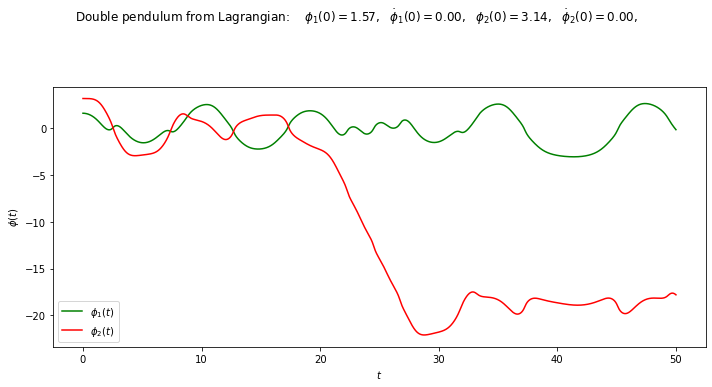

In [9]:
#For plotting now

#To plot: 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_10:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_10_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_20:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_20_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_1 = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)


plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
           axis_labels = phi_vs_time_labels,
           color = "green",
           label=r'$\phi_1(t)$',
           ax = ax_1)

plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
           color = "red",
           label=r'$\phi_2(t)$',
           ax = ax_1)

fig.tight_layout()


In [10]:
#Different initial conditions, small angles for the approximation 

In [11]:
#define initial conditions here

phi_10 = np.pi / 300
phi_10_dot = 0. 
phi_20 = np.pi / 200
phi_20_dot = 0. 

y6 = [phi_10, phi_10_dot, phi_20, phi_20_dot]


phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, y6)


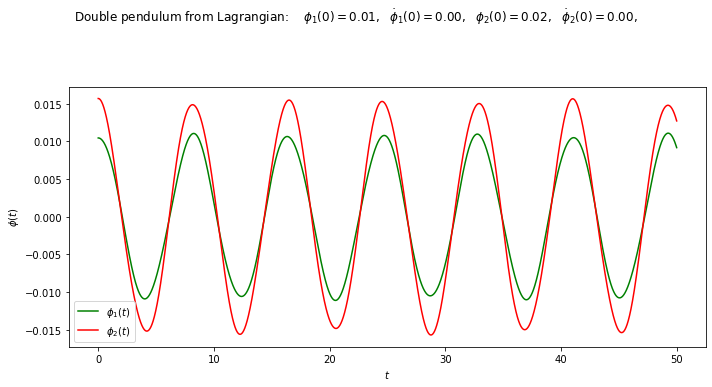

In [12]:
#For plotting now

#To plot: 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_10:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_10_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_20:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_20_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_2 = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)


plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
           axis_labels = phi_vs_time_labels,
           color = "green",
           label=r'$\phi_1(t)$',
           ax = ax_2)

plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
           color = "red",
           label=r'$\phi_2(t)$',
           ax = ax_2)

fig.tight_layout()


#### Here we see the difference in plots when we use small angles as initial conditions vs not small angle. For small angle, 
#### the motion for both pendulums looks periodic. But when we use bigger angles, for the same time period, we see that 
#### motion is actually chaotic, i.e. we see that the motion does not repeat itself. And as the time goes on, that chaos leads to 
#### a completely different motion for both of the pendulums. 

#### Now, for seeing how delta phi changes 

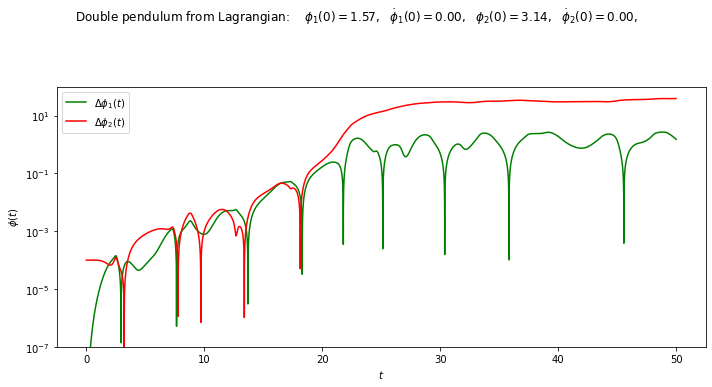

In [13]:
phi_10 = np.pi / 2
phi_10_dot = 0. 
phi_20 = np.pi
phi_20_dot = 0. 

y1 = [phi_10, phi_10_dot, phi_20, phi_20_dot]
y2 = [phi_10, phi_10_dot, phi_20 - 0.0001, phi_20_dot]

phi_1a, phi_1a_dot, phi_2a, phi_2a_dot = p1.solve_ode(t_pts, y1)

phi_1b, phi_1b_dot, phi_2b, phi_2b_dot = p1.solve_ode(t_pts, y2) 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_10:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_10_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_20:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_20_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_1 = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)



plot_y_vs_x(t_pts[start : stop], np.abs(phi_1a[start : stop] - phi_1b[start : stop]), 
           axis_labels = phi_vs_time_labels,
           color = "green", semilogy=True, 
           label=r'$\Delta\phi_1(t)$',
           ax = ax_1)


plot_y_vs_x(t_pts[start : stop], np.abs(phi_2a[start : stop] - phi_2b[start : stop]), 
           color = "red", semilogy=True, 
           label=r'$\Delta\phi_2(t)$',
           ax = ax_1)

ax_1.set_ylim(1.e-7, 1.e2)

fig.tight_layout()



# Now animate 

In [14]:
#Instantiate another pendulum for animation

t_start = 0.
t_end = 400. 
delta_t = 0.01

t_pts = np.arange(t_start, t_end + delta_t, delta_t)


#Initial conditions for this pendulum:

L1 = 2.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

#Instantiate 
animated_dp = DoublePendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

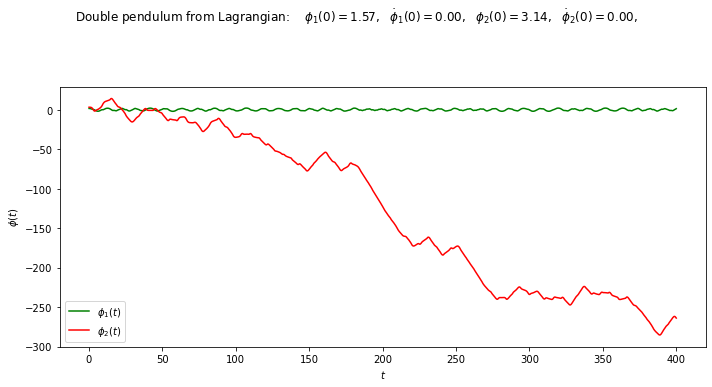

In [15]:
#Intial conditions for the two penudlums,a and b, with different initial conditions for annimation 

#Conditions for pendulum set a
phi_1a_0 = np.pi/2
phi_1a_0_dot = 0.
phi_2a_0 = np.pi
phi_2a_0_dot = 0.

#Conditions for pendulum set b
phi_1b_0 = np.pi / 2
phi_1b_0_dot = 0.
phi_2b_0 = phi_2a_0 - 0.001
phi_2b_0_dot = 0.


k1 = [phi_1a_0, phi_1a_0_dot, phi_2a_0, phi_2a_0_dot]
k2 = [phi_1b_0, phi_1b_0_dot, phi_2b_0, phi_2b_0_dot]


phi_1a, phi_1a_dot, phi_2a, phi_2a_dot = animated_dp.solve_ode(t_pts, k1)
phi_1b, phi_1b_dot, phi_2b, phi_2b_dot = animated_dp.solve_ode(t_pts, k2)



#To plot: 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_1a_0:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_1a_0_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_2a_0:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_2a_0_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_animated = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)


plot_y_vs_x(t_pts[start : stop], phi_1b[start : stop], 
           axis_labels = phi_vs_time_labels,
           color = "green",
           label=r'$\phi_1(t)$',
           ax = ax_animated)

plot_y_vs_x(t_pts[start : stop], phi_2b[start : stop], 
           color = "red",
           label=r'$\phi_2(t)$',
           ax = ax_animated)

fig.tight_layout()


#### We see how that with a very slight difference between the initial condition for the second pendulum of each set, we see that
#### both pendulums lead to a very different motion over a period of time. The motion is chaotic still, since we're using bigger angles.
#### This also shows how important the initial conditions can be that determine the following motion.

In [16]:
from matplotlib import animation, rc
from IPython.display import HTML 

In [17]:
def xy_coords(x0, y0, phi, L):
    
    """
    Describe method here
    """
    
    x = x0 + L * np.sin(phi)
    y = y0 - L * np.cos(phi)
    
    return x, y

In [18]:
%%capture 
x_min = -3.2 
x_max = -x_min
y_min = -3.2
y_max = -y_min


fig_animation = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_animation = fig_animation.add_subplot(1,1,1)
ax_animation.set_xlim(x_min, x_max)
ax_animation.set_ylim(y_min, y_max)

x0, y0 = 0., 0.

pt0_animation, = ax_animation.plot(x0, y0, 'o', markersize = 6, color = "black")

x1, y1 = xy_coords(x0, y0, phi_1a[0], animated_dp.L1)
pt1_animation, = ax_animation.plot(x1, y1, 'o', markersize = 12, color = "red")


ln1_animation, = ax_animation.plot([x0, x1], [y0, y1], color = "red", lw = 3)

x2, y2 = xy_coords(x1, y1, phi_2a[0], animated_dp.L2)
pt2_animation, = ax_animation.plot(x2, y2, 'o', markersize = 12, color = "red")

ln2_animation, = ax_animation.plot([x1, x2], [y1, y2], color = "red", lw = 3)

x1b, y1b = xy_coords(x0, y0, phi_1b[0], animated_dp.L1)
pt1b_animation, = ax_animation.plot(x1b, y1b, 'o', markersize = 12, color = "green")

ln1b_animation, = ax_animation.plot([x0, x1b], [y0, y1b], color = "green", lw = 3)

x2b, y2b = xy_coords(x1b, y1b, phi_2b[0], animated_dp.L2)
pt2b_animation, = ax_animation.plot(x2b, y2b, 'o', markersize = 12, color = "green")

ln2b_animation, = ax_animation.plot([x1b, x2b], [y1b, y2b], color = "green", lw = 3)

ax_animation.set_aspect(1)
ax_animation.axis('off')

fig_animation.tight_layout()


In [19]:
def animate_pendulum(i):
    
    i_skip = i * 2
    
    x0, y0 = 0., 0.
    
    
    pt0_animation.set_data(x0, y0)
    
    
    x1, y1 = xy_coords(x0, y0, phi_1a[i_skip], animated_dp.L1)
    pt1_animation.set_data(x1, y1)

    ln1_animation.set_data([x0, x1], [y0, y1])
    
    x2, y2 = xy_coords(x1, y1, phi_2a[i_skip], animated_dp.L2)
    pt2_animation.set_data(x2, y2)

    ln2_animation.set_data([x1, x2], [y1, y2])
    
    
    x1b, y1b = xy_coords(x0, y0, phi_1b[i_skip], animated_dp.L1)
    pt1b_animation.set_data(x1b, y1b)
    ln1b_animation.set_data([x0, x1b], [y0, y1b])

    x2b, y2b = xy_coords(x1b, y1b, phi_2b[i_skip], animated_dp.L1)
    pt2b_animation.set_data(x2b, y2b)
    ln2b_animation.set_data([x1b, x2b], [y1b, y2b])
    
    
    return (pt0_animation, pt1_animation, ln1_animation, pt2_animation, ln2_animation, 
           pt1b_animation, ln1b_animation, pt2b_animation, ln2b_animation)
    


In [20]:
frame_interval = 20. 
frame_number = 1001 #Same length as t_pts, for each frame

anim = animation.FuncAnimation(fig_animation,
                               animate_pendulum, 
                               init_func = None,
                               frames = frame_number,
                               interval = frame_interval, 
                               blit = True,
                               repeat = False)
                                  

In [21]:
HTML(anim.to_jshtml())

### We see how after a certain time both set of pendulums go through a different motion, which is again chaotic given that we used bigger angles. 